# Проект "Ранжирование в поиске"

Поиск товаров в онлайн магазине состоит из нескольких этапов. Первый этап по ключевым характеристикам находятся наиболее подходящие кандидаты. Далее отбирается более узкий набор товаров, исходя из наличия на складе, локации и пр. Следующий этап - ранжирование отобранных товаров. Задача состоит в разработке системы оптимизации ранжирования предпоследнего этапа.

**Целью работы** является создание модели и создание Docker образа

Решение состоит из 4 этапов:

1. [Формализации задачи и анализа EDA](#step1)
2. [Проработка вариантов решения](#step2)
3. [Baseline](#step3)
4. [Оптимизация решения](#step4)


## Этап 1: формализация задачи и анализ EDA <a class="anchor" id="step1"></a> 

### Содержание

* [Формализация задачи](#chapter1)
* [EDA](#chapter2)
    * [Построение гистограмм](#section_2_2)
    * [Feature 2](#section_2_3)
    * [Feature 5](#section_2_4)
    * [Feature 6](#section_2_5)
    * [Feature 10](#section_2_6)
    * [Матрица корреляций](#section_2_7)
    * [Target](#section_2_8)
* [Итоговый вывод](#chapter3)

## Формализация задачи <a class="anchor" id="chapter1"></a>
Описание этапа

На данном этапе необходимо:

- Проработать проблематику (чем подобного рода проблемы могут грозить бизнесу)
- Формализовать задачу
- Проанализировать имеющиеся данные и оценить их пригодность для решения поставленной задачи
- Провести первичный разведочный анализ данных (EDA)


### Важность задачи ранжирования в бизнесе

**Задача Ранжирования ("Learn to Rank")** - это задача машинного обучения, используемый в системах поиска информации и рекомендаций для повышения релевантности результатов, представленных пользователям. Играют значительную роль в различных областях бизнеса, особенно в тех, которые сильно зависят от поисковых систем, систем рекомендаций или механизмов ранжирования контента, как поисковые системы маркетплейсов.

Наиболее важные аспекты ранжирования для поисковой системы следующие:

1. **Улучшенный пользовательский опыт:** Алгоритмы LTR направлены на то, чтобы лучше понимать предпочтения и намерения пользователей, что приводит к более релевантным и персонализированным результатам. Что приводит к улучшению пользовательского опыта, поскольку пользователи с большей вероятностью найдут то, что ищут, быстро и эффективно.

2. **Повышение вовлеченности и коэффициента конверсии:** Предоставляя пользователям более релевантный контент или рекомендации по продуктам, компании могут повысить вовлеченность пользователей и коэффициент конверсии. Пользователи с большей вероятностью будут взаимодействовать с контентом или совершать покупки, когда они воспринимают его как ценный и соответствующий их потребностям.

3. **Конкурентное преимущество:** обеспечение превосходного пользовательского опыта может стать ключевым отличием для бизнеса. Внедрение эффективных алгоритмов LTR может дать предприятиям конкурентное преимущество за счет предоставления более актуального и персонализированного опыта по сравнению с их конкурентами.

4. **Удержания клиентов:** Когда пользователи постоянно находят релевантный и ценный контент или продукты с помощью бизнес-платформы, они, скорее всего, будут удовлетворены своим опытом. Это может привести к более высоким показателям удержания клиентов и повышению лояльности клиентов с течением времени.

5. **Адаптивность и масштабируемость:** Алгоритмы LTR могут адаптироваться к изменяющемуся поведению и предпочтениям пользователей с течением времени, что делает их масштабируемыми решениями для предприятий любого размера. По мере роста и эволюции пользовательских данных алгоритмы LTR могут продолжать улучшать и уточнять свои рекомендации, гарантируя, что они остаются эффективными при получении соответствующих результатов.

В целом, важность "Learn to Rank" в бизнесе заключается в его способности улучшать пользовательский опыт, стимулировать вовлеченность и конверсии, получать конкурентные преимущества, оптимизировать поиск контента, повышать удовлетворенность и удержание клиентов, обеспечивать принятие решений на основе данных и предоставлять адаптируемые и масштабируемые решения для предприятий, работающих в различных областях. домены.

**Цель проект:** Создание сервиса ранжирования данных.

Превой залачей является EDA предоставленных данных для оценки из пригодности и выявлений аномалий для дальнейшей подготовки их к обучению

## 1. EDA <a class="anchor" id="chapter2"></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install phik
#!pip install polars

In [3]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552452 sha256=a5cff3bf7affe1513b5849316d4c47796cc49df86475da3f9df6797c87fc4e5a
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


Импортируем библиотеки и данные

In [4]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import warnings
import polars as pl
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from annoy import AnnoyIndex
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import torch
import datetime
import torch.nn as nn
from itertools import combinations
from scipy.special import expit
from sklearn.metrics import ndcg_score
from typing import List
import math
import torch
import torch.nn as nn
from itertools import combinations
from scipy.special import expit
from sklearn.model_selection import KFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import ShuffleSplit

In [5]:
df = pl.read_parquet('drive/MyDrive/train_features.parquet')

In [ ]:
df_pd = pd.read_parquet('drive/MyDrive/train_features.parquet')
df_test = pl.read_parquet('drive/MyDrive/test_features.parquet')

In [ ]:
seed = 123

Рассмотрим данные

In [ ]:
df.head()

query_id,report_date,target,rn,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11
u32,datetime[ns],bool,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-11 00:00:00,false,4,0.693,0.1,0.245833,3.376496,0.7777,0.0,2.87166,0.97,1.0,4.6,-0.196707
2,2024-01-11 00:00:00,false,5,0.281,0.1,0.108333,2.909165,0.7882,0.0,1.978092,0.96,0.89,4.8,0.034091
2,2024-01-11 00:00:00,false,8,0.319,0.183333,0.154167,1.725731,0.688,0.5,2.083885,0.95,0.9,4.7,0.286658
2,2024-01-11 00:00:00,false,10,0.281,0.1,0.108333,3.759698,0.7882,1.0,1.898608,0.98,0.81,4.8,0.052632
2,2024-01-11 00:00:00,false,12,0.281,0.1,0.108333,0.026253,0.7055,0.0,0.317658,0.96,0.85,4.7,0.172424


In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22691379 entries, 0 to 22691378
Data columns (total 15 columns):
 #   Column       Dtype         
---  ------       -----         
 0   query_id     uint32        
 1   report_date  datetime64[ns]
 2   target       bool          
 3   rn           int64         
 4   feature_1    float64       
 5   feature_2    float64       
 6   feature_3    float64       
 7   feature_4    float64       
 8   feature_5    float64       
 9   feature_6    float64       
 10  feature_7    float64       
 11  feature_8    float64       
 12  feature_9    float64       
 13  feature_10   float64       
 14  feature_11   float64       
dtypes: bool(1), datetime64[ns](1), float64(11), int64(1), uint32(1)
memory usage: 2.3 GB


In [ ]:
df.describe()

describe,query_id,report_date,target,rn,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11
str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2.2691379e7,"""22691379""","""22691379""",2.2691379e7,2.2691379e7,2.2691379e7,2.2691379e7,2.2691379e7,2.2688113e7,2.2691379e7,2.2691379e7,1.508577e7,2.2691379e7,2.2691379e7,2.2691379e7
"""null_count""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,3266.0,0.0,0.0,7.605609e6,0.0,0.0,0.0
"""mean""",298297.604273,null,null,53.102646,0.730732,0.219791,0.296802,0.615299,0.803091,0.103176,1.345817,0.940945,0.717853,4.66981,0.075862
"""std""",172791.460958,null,null,28.062587,0.922102,0.242939,0.246257,1.326826,0.108361,0.298695,1.515479,0.048151,0.181307,0.151729,0.144936
"""min""",2.0,"""2024-01-11 00:…","""False""",1.0,0.0,0.016667,0.0,0.0,0.0001,-1.0,0.0,0.23,0.01,3.2,-3.0
"""25%""",149060.0,null,null,29.0,0.134,0.1,0.133333,0.00885,0.75,0.0,0.0,0.92,0.67,4.6,0.025382
"""50%""",298123.0,null,null,54.0,0.398,0.116667,0.2125,0.095728,0.82,0.0,0.892091,0.95,0.75,4.7,0.086021
"""75%""",447982.0,null,null,77.0,0.9235,0.25,0.375,0.521567,0.87,0.0,2.295441,0.97,0.83,4.8,0.14796
"""max""",598221.0,"""2024-01-25 00:…","""True""",100.0,9.7845,8.4,5.245833,9.999986,1.0,1.0,16.146496,1.0,1.0,5.0,0.998144


Из таблицы сверху мы видим, что feature_8 и feature_5 имеют пропуски

In [ ]:
print('Процент пропусков в полях')
df.null_count() / df.shape[0] * 100

Процент пропусков в полях


query_id,report_date,target,rn,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014393,0.0,0.0,33.517615,0.0,0.0,0.0


In [ ]:
df.is_duplicated().sum()

0

In [ ]:
print('самая раняя дата', df.select(pl.col('report_date').min()))
print('самая поздняя дата', df.select(pl.col('report_date').max()))

самая раняя дата shape: (1, 1)
┌─────────────────────┐
│ report_date         │
│ ---                 │
│ datetime[ns]        │
╞═════════════════════╡
│ 2024-01-11 00:00:00 │
└─────────────────────┘
самая поздняя дата shape: (1, 1)
┌─────────────────────┐
│ report_date         │
│ ---                 │
│ datetime[ns]        │
╞═════════════════════╡
│ 2024-01-25 00:00:00 │
└─────────────────────┘


In [ ]:
print('доля верных и ложных значений')
df.select(pl.col('target').value_counts())

доля верных и ложных значений


target
struct[2]
"{true,289242}"
"{false,22402137}"


Процент верных выводов для всего датасета

In [ ]:
df.filter(pl.col('target') == True).shape[0] / df.shape[0] * 100

1.2746779294462447

Процент верных выводов для незаполненных feature_8

In [ ]:
df.filter((pl.col('feature_8').is_null()) & (pl.col('target') == True)).shape[0] / df.filter(pl.col('feature_8').is_null()).shape[0] * 100

0.4760565524733128

Процент верных выводов для незаполненных feature_5

In [ ]:
df.filter((pl.col('feature_5').is_null()) & (pl.col('target') == True)).shape[0] / df.filter(pl.col('feature_5').is_null()).shape[0] * 100

0.21432945499081446

**Вывод 1:**

Мы обнаружили следующее:

- Невысокая доля верных подборов: 1,3% верных против 98,7% неверных

- В датасете имеются 15 признаков: query_id и rn - целочисленные, report_date - время, target - логическая, остальные вещественные.

- Пропуски имеются в feature_5 и feature_8, 1.4% и 34% соответственно. При этом распределение верных/ложных ответов значительно отличается 0,2% и 0,5% соответственно.

- Имеются данные с 11 января по 25 января 2024 года

- В данных нет дубликатов


Рассмотрим распределение данных

### Построение гистограмм <a class="anchor" id="section_2_2"></a>

In [ ]:
list_column = df.columns
list2 = ['target','report_date']

for item in list2:
    if item in list_column:
        list_column.remove(item)
print(list_column)

['query_id', 'rn', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11']


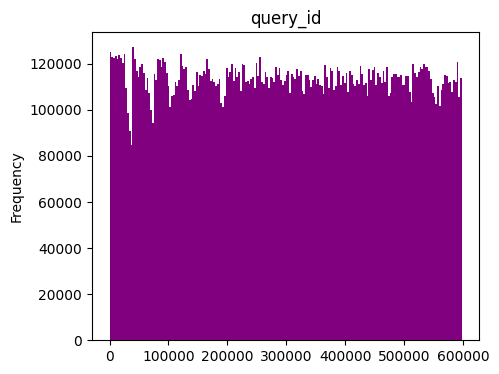

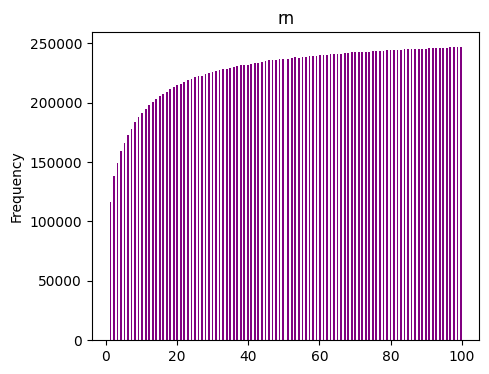

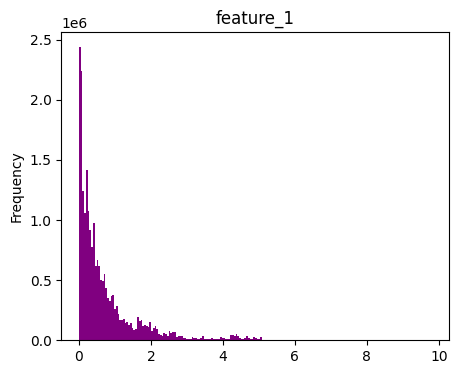

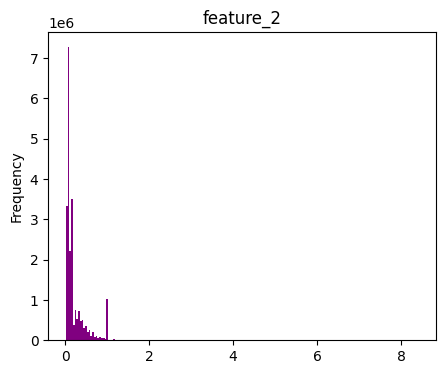

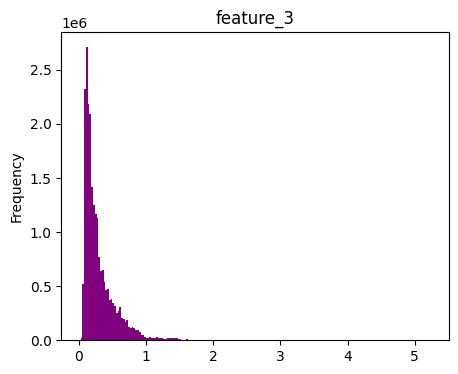

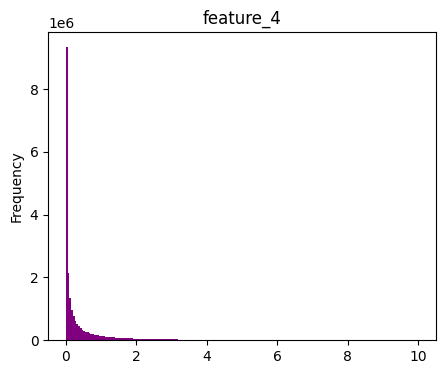

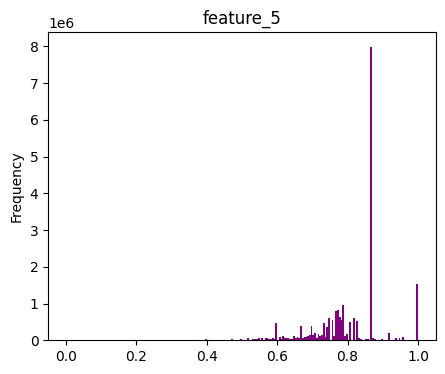

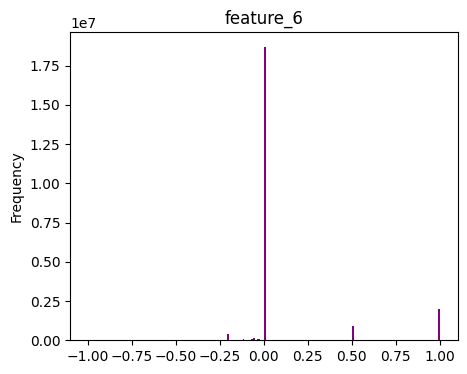

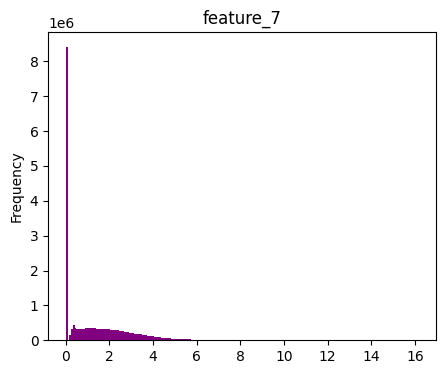

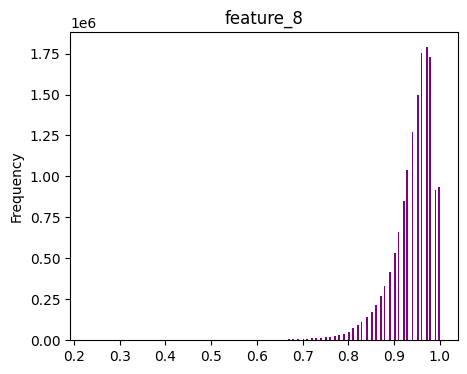

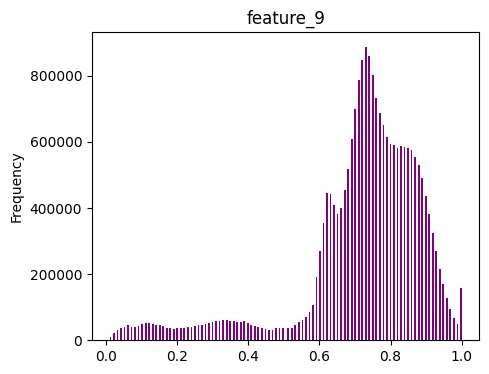

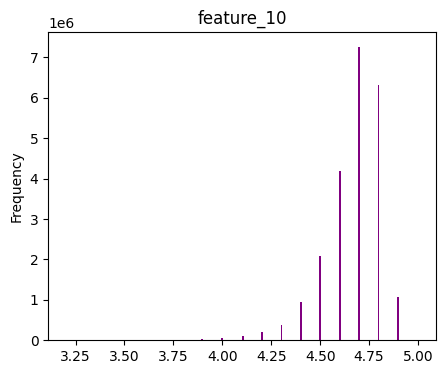

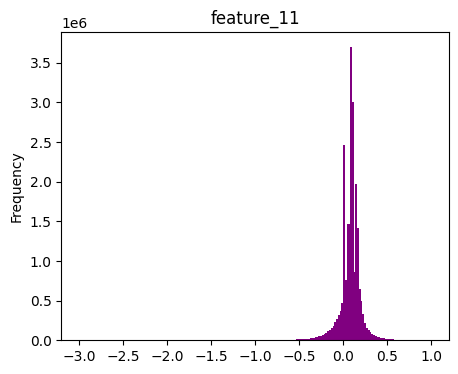

In [ ]:
for column in list_column:
    plt.figure(figsize=(5,4))
    df[column].to_pandas().plot(kind="hist",bins=200, color='purple',)
    plt.title(column)
    plt.show()

Построим ящик с усами

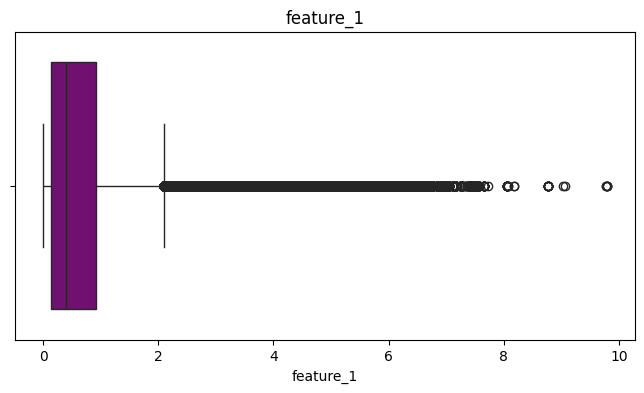

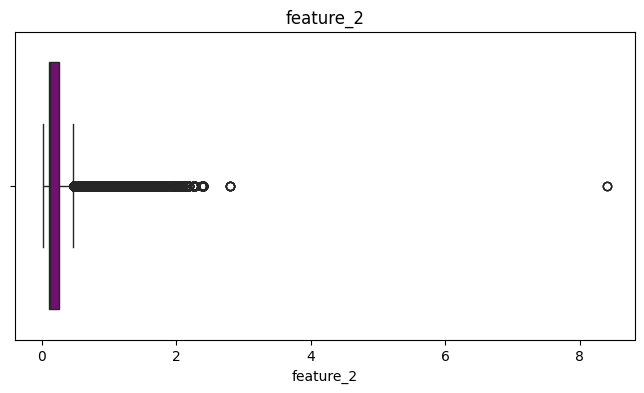

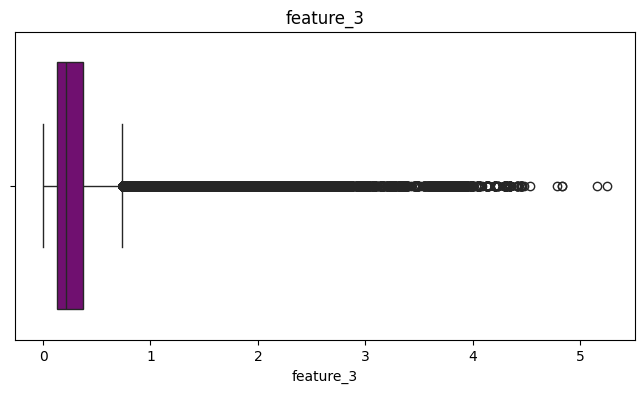

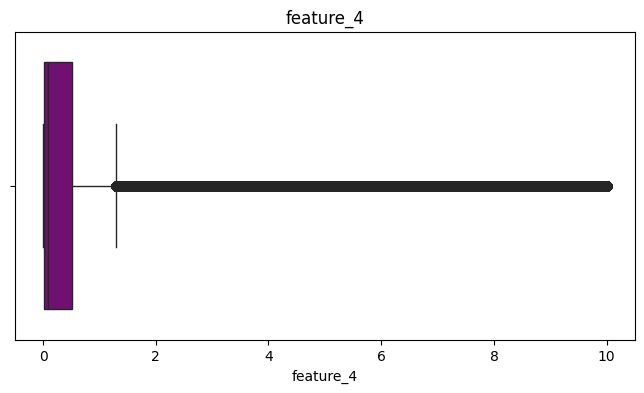

In [ ]:
for column in list_column[2:7]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x =df[column].to_pandas(),color='purple',)
    plt.title(column)
    plt.show()

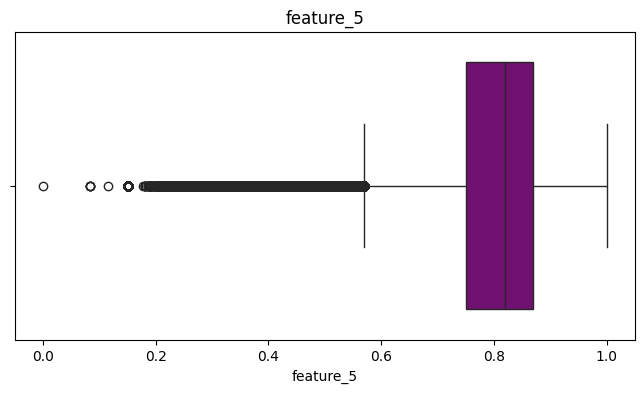

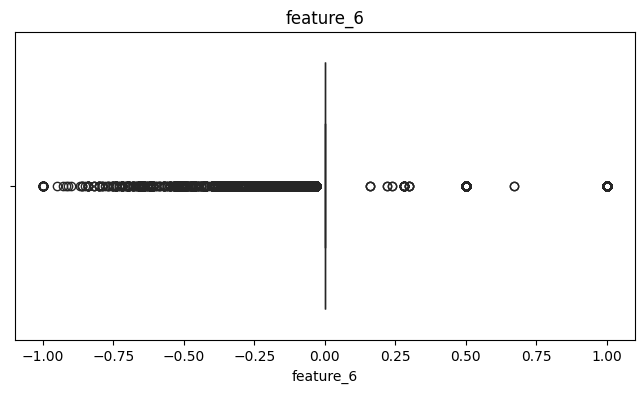

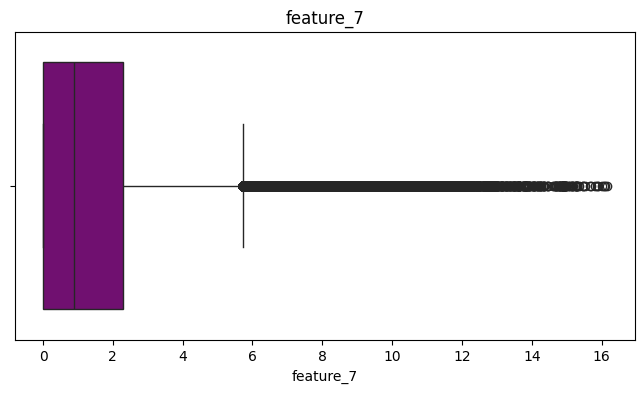

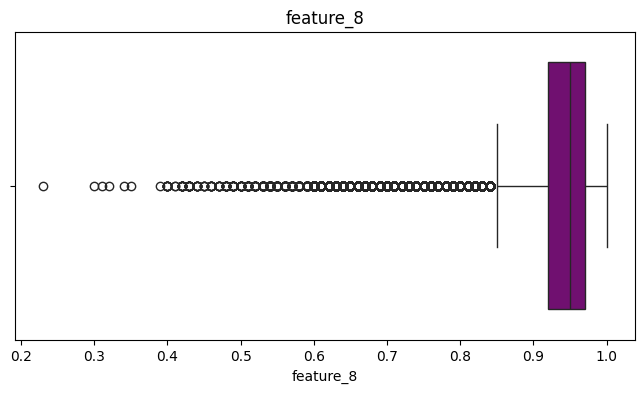

In [ ]:
for column in list_column[7:]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x =df[column].to_pandas(),color='purple',)
    plt.title(column)
    plt.show()

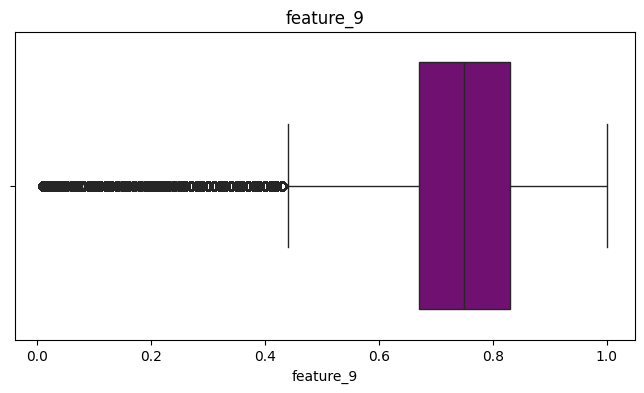

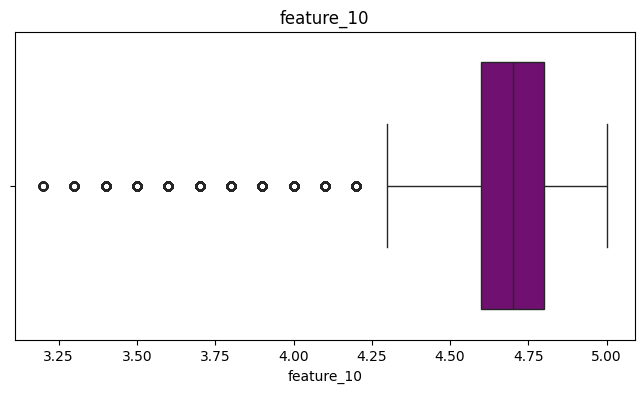

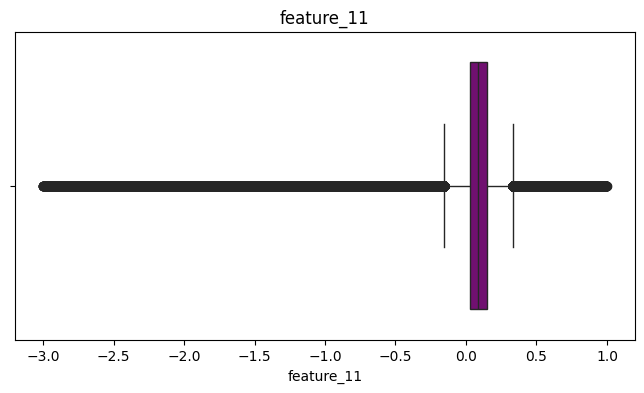

In [ ]:
for column in list_column[10:]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x =df[column].to_pandas(),color='purple',)
    plt.title(column)
    plt.show()

Исходя из графиков часть признаков распределены с выбросами и аномальными значениями.

Рассмотрим каждый такой признак индивидуально:

### Feature_2 <a class="anchor" id="section_2_3"></a>

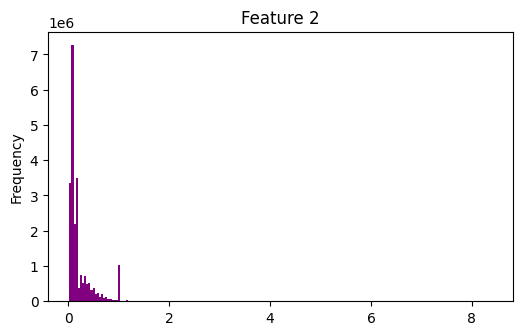

In [ ]:
plt.figure(figsize=(6,3.5))
plt.title('Feature 2')
df['feature_2'].to_pandas().plot(kind="hist",bins=200, color='purple',)
plt.show()

Из гистограммы виден пик около 1, так же из бокса с усами был виден выбрас в диапазоне 8

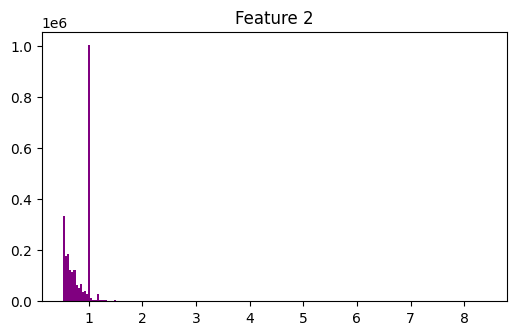

In [ ]:
plt.figure(figsize=(6,3.5))
plt.title('Feature 2')
plt.hist(df.filter(df['feature_2'] > 0.5).select('feature_2'), bins=200, color='purple',)
plt.show()

In [ ]:
df.filter(df['feature_2'] > 2.4).select(pl.count('feature_2'))

feature_2
u32
9


In [ ]:
df.filter(df['feature_2'] > 2.4)

query_id,report_date,target,rn,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11
u32,datetime[ns],bool,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
304642,2024-01-21 00:00:00,false,10,0.025,2.8,0.0,0.0,1.0,0.0,0.0,null,0.38,4.7,0.0
304642,2024-01-21 00:00:00,false,11,0.025,2.8,0.0,0.0,1.0,0.0,0.0,null,0.38,4.7,0.0
304642,2024-01-21 00:00:00,false,12,0.025,2.8,0.0,0.0,0.96,0.0,0.0,null,0.38,4.7,0.0
304642,2024-01-21 00:00:00,false,13,0.025,2.8,0.0,0.0,0.92,0.0,0.0,null,0.38,4.7,0.0
304642,2024-01-21 00:00:00,false,61,0.025,2.8,0.0,0.0,1.0,0.0,0.0,null,0.25,4.7,0.105263
304642,2024-01-21 00:00:00,false,62,0.025,2.8,0.0,0.0,0.95,0.0,0.0,null,0.25,4.7,0.10528
335293,2024-01-16 00:00:00,false,92,0.025,8.4,0.0,0.0,0.9375,0.0,0.0,null,0.13,4.8,0.0
497674,2024-01-18 00:00:00,false,71,0.025,8.4,0.0,0.0,0.9583,0.0,0.0,null,0.09,4.8,0.0
497674,2024-01-18 00:00:00,false,88,0.025,8.4,0.0,0.0,0.9583,0.0,0.0,null,0.08,4.8,0.0


**Вывод 2:**

В  1 действительно есть пик, также всего 9 значений больше 2.4. И все они относятся к ложной выдачи.
Эти значения отрицательного класса, удалим их так как они искажают данные перекосом в большую сторону

In [ ]:
df = df.filter(df['feature_2'] < 2.4)

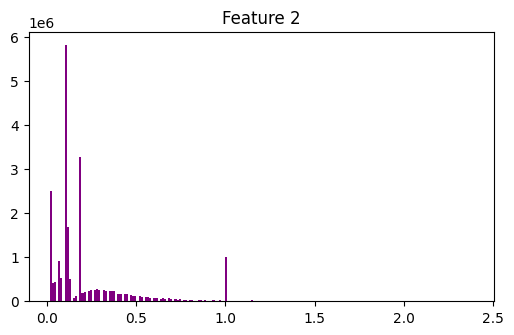

In [ ]:
plt.figure(figsize=(6,3.5))
plt.title('Feature 2')
plt.hist(df.select('feature_2'), bins=200, color='purple',)
plt.show()

In [ ]:
print('Количество уникальных значений', df.n_unique('feature_2'))
print('\n','Наиболее частые значения')
display(df['feature_2'].value_counts().sort('count', descending=True).head(10))

Количество уникальных значений 125

 Наиболее частые значения


feature_2,count
f64,u32
0.1,5835489
0.183333,3288725
0.016667,2496815
0.116667,1693170
1.0,996121
0.066667,916786
0.083333,527041
0.133333,510740
0.05,429385


## Feature_5 <a class="anchor" id="section_2_4"></a>

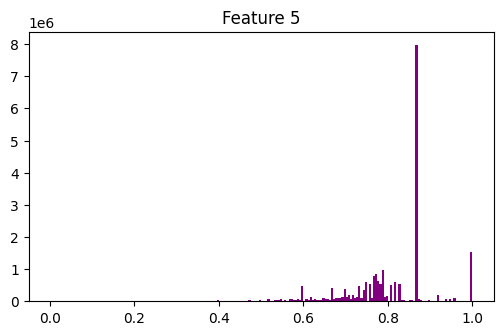

In [ ]:
plt.figure(figsize=(6,3.5))
plt.title('Feature 5')
plt.hist(df['feature_5'], bins=200, color='purple',)
plt.show()

In [ ]:
print('\n','Наиболее частые значения')
display(df['feature_5'].value_counts().sort('count', descending=True).head(10))


 Наиболее частые значения


feature_5,count
f64,u32
0.87,7981159
1.0,1525014
0.82,593171
0.75,553430
0.7866,527329
0.76,498903
0.8074,498763
0.7666,498471
0.6,459110


Проверим различается ли таргет для пиковых значений feature 5

In [ ]:
df.filter(df['feature_5'] == 0.87).groupby(by='target').agg(pl.count('feature_5'))

<ipython-input-43-9a3f9209f5e6>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df.filter(df['feature_5'] == 0.87).groupby(by='target').agg(pl.count('feature_5'))


target,feature_5
bool,u32
false,7880905
true,100254


In [ ]:
df.filter(df['feature_5'] == 1).groupby(by='target').agg(pl.count('feature_5'))

<ipython-input-45-b4ea7c88c502>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df.filter(df['feature_5'] == 1).groupby(by='target').agg(pl.count('feature_5'))


target,feature_5
bool,u32
false,1506939
true,18075


Проверим не являются ли эти признаки результатом какой-нибудь акции, проверим даты

In [ ]:
df.filter(df['feature_5'] == 0.87).select(pl.col('report_date').unique())

report_date
datetime[ns]
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00


**Вывод 3:**

В распределении 5 признака выбивается пик в 0.87. Его природа неясна. Пик не связан с датой

### Feature_6 <a class="anchor" id="section_2_5"></a>

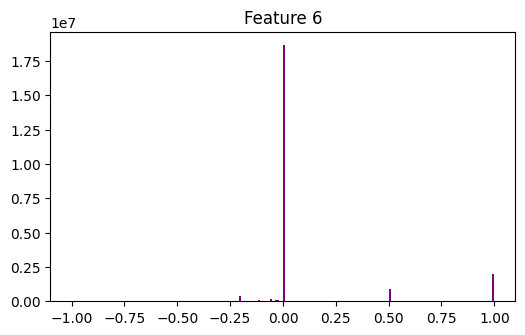

In [ ]:
plt.figure(figsize=(6,3.5))
plt.title('Feature 6')
plt.hist(df['feature_6'], bins=200, color='purple',)
plt.show()

In [ ]:
 round(df.filter(df['feature_6'] < 0).shape[0] / df.shape[0] * 100,1)

4.7

In [ ]:
 round(df.filter(df['feature_6'] > 0).shape[0] / df.shape[0] * 100,1)

12.9

12.9

Из ящика с усами видно, что 83% значений признака равно 0. 4,7% < 0 и 13% > 0

In [ ]:
display(df.filter(df['feature_6'] == 0).groupby(by='target').agg(pl.count('feature_6')))
display(df.filter(df['feature_6'] < 0).groupby(by='target').agg(pl.count('feature_6')))
display(df.filter(df['feature_6'] > 0).groupby(by='target').agg(pl.count('feature_6')))

<ipython-input-67-7e33ed506cf0>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  display(df.filter(df['feature_6'] == 0).groupby(by='target').agg(pl.count('feature_6')))


target,feature_6
bool,u32
false,18465197
true,222471


<ipython-input-67-7e33ed506cf0>:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  display(df.filter(df['feature_6'] < 0).groupby(by='target').agg(pl.count('feature_6')))


target,feature_6
bool,u32
false,1051069
true,14588


<ipython-input-67-7e33ed506cf0>:3: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  display(df.filter(df['feature_6'] > 0).groupby(by='target').agg(pl.count('feature_6')))


target,feature_6
bool,u32
true,52183
false,2885812


In [ ]:
print('соотношение классов (feature_6 == 0)', round(222471 /  18465256 * 100,1))
print('соотношение классов (feature_6 < 0)', round(14588 /  1051069 * 100,1))
print('соотношение классов (feature_6 > 0)', round(52183 /  2885812 * 100,1))

соотношение классов (feature_6 == 0) 1.2
соотношение классов (feature_6 < 0) 1.4
соотношение классов (feature_6 > 0) 1.8


**Вывод 4:**

Feature 6 распределен неравномерно, 83% значений признака = 0. При этом соотношение классов целевого признака разное. Для 0, 1.2%; меньше 0, 1.4%; больше 0, 1.8%

### Feature_10 <a class="anchor" id="section_2_6"></a>

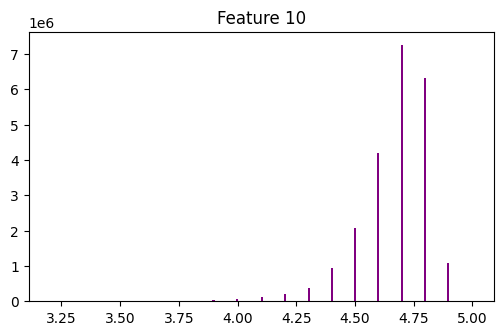

In [ ]:
plt.figure(figsize=(6,3.5))
plt.title('Feature 10')
plt.hist(df['feature_10'], bins=200, color='purple',)
plt.show()

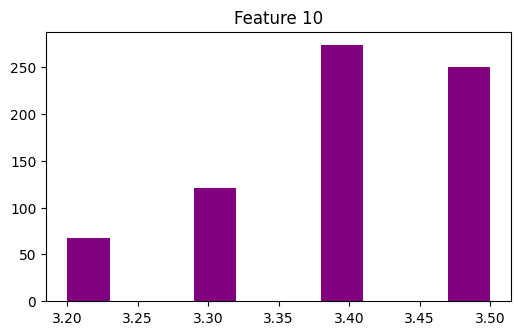

In [ ]:
plt.figure(figsize=(6,3.5))
plt.title('Feature 10')
plt.hist(df.filter(df['feature_10'] < 3.6).select('feature_10'), bins=10, color='purple',)
plt.show()

**Вывод 6:**  

Ящик с усами показал выбросы Feature 10 ниже 3.6. Однако барплот показал, что такое распределение связано  с дискредностью признака

### Матрица корреляций <a class="anchor" id="section_2_7"></a>

In [ ]:
df_pd['day'] = df_pd.report_date.dt.day
df_pd['dow'] = df_pd.report_date.dt.dayofweek

interval columns not set, guessing: ['query_id', 'rn', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'day']


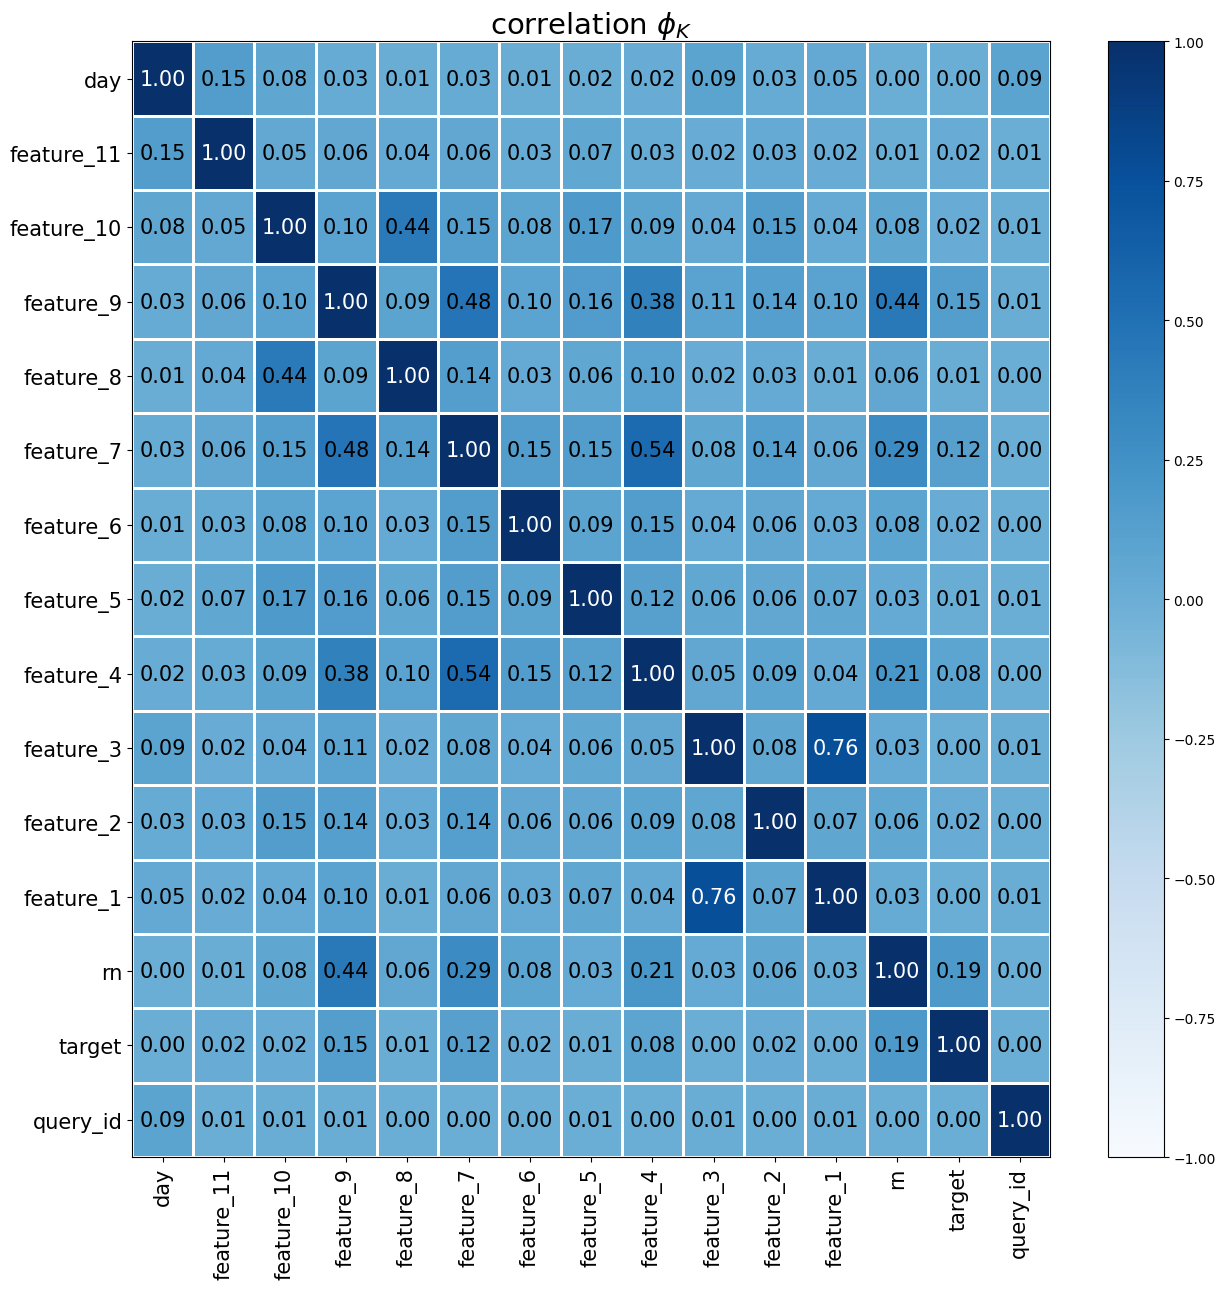

In [ ]:
phik_overview = df_pd.sample(frac=0.3, random_state=seed).drop('report_date',axis=1).phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=-1, vmax=1, color_map="Blues",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(13, 13))

Добавим еще день недели и рассмотрим прищнаки которые коррелировали с day и признаки с пропусками

interval columns not set, guessing: ['day', 'dow', 'feature_11', 'feature_3', 'feature_5', 'feature_8']


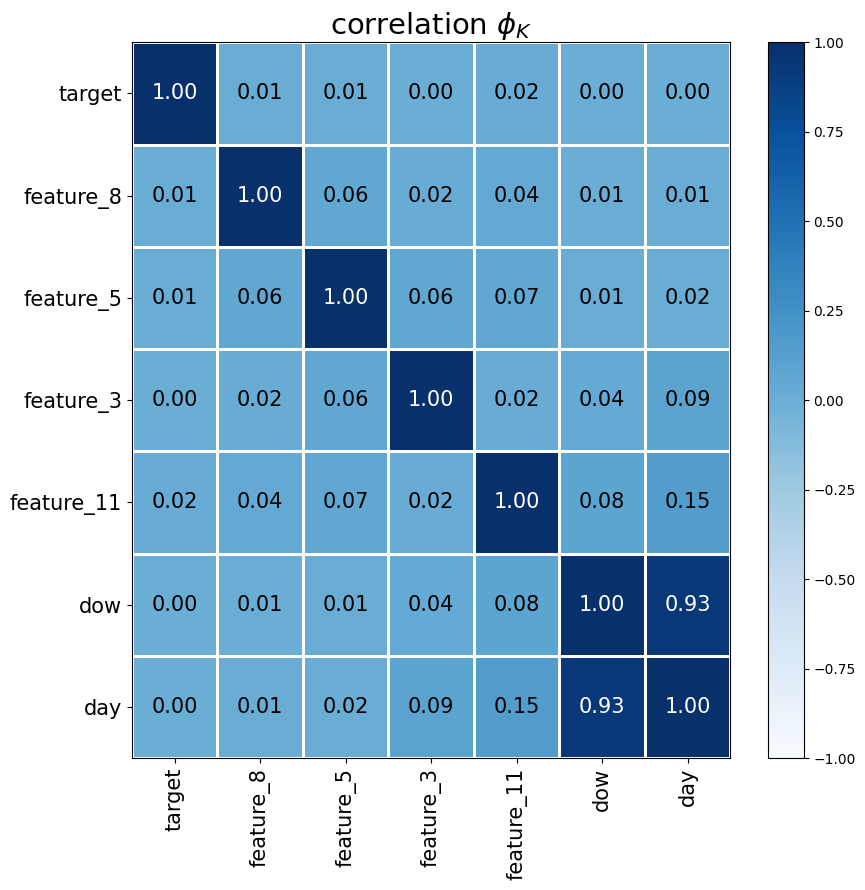

In [ ]:
phik_overview = df_pd[['day','dow','feature_11','feature_3','feature_5','feature_8','target']].sample(frac=0.3, random_state=seed).phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=-1, vmax=1, color_map="Blues",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(9, 9))

**Вывод 6:**

Таблица корреляций показла, что  rn коррелирует feature_9, feature_7, feaure_4, tratget. Так же имеется высокая корреляция между feature_1 и feature_3, feature_4 и feature_7.

### Target <a class="anchor" id="section_2_8"></a>

Рассмотрим распределение target по дате и ранку

<ipython-input-32-e1e6c7751326>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df.groupby(by='rn').agg(pl.sum('target')).to_pandas().sort_values(by='rn').plot.bar(x='rn',y='target')


<Axes: xlabel='rn'>

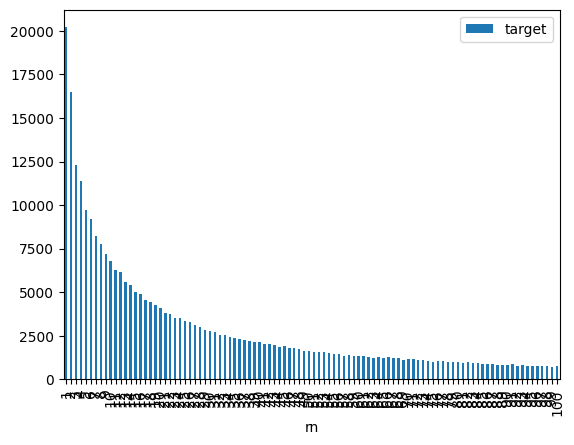

In [ ]:
df.groupby(by='rn').agg(pl.sum('target')).to_pandas().sort_values(by='rn').plot.bar(x='rn',y='target')

In [ ]:
(
    df
    .group_by(pl.col("report_date").dt.round("1d"))
    .agg(
        pl.col("query_id").n_unique().alias("n_queries"),
    )
    .to_pandas()
    .set_index("report_date")
    ["n_queries"].plot()
)

<Axes: xlabel='report_date'>

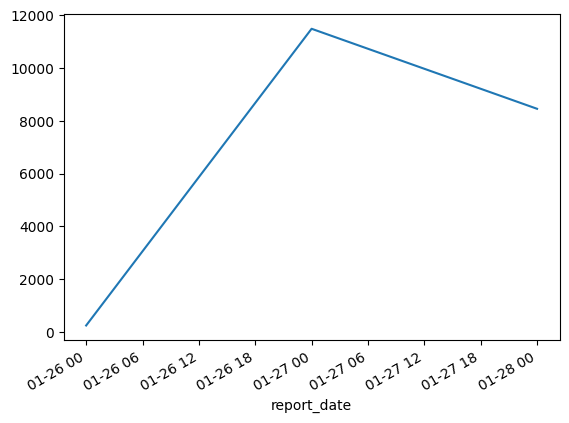

In [ ]:
(
    df_test
    .group_by(pl.col("report_date").dt.round("1d"))
    .agg(
        pl.col("query_id").n_unique().alias("n_queries"),
    )
    .to_pandas()
    .set_index("report_date")
    ["n_queries"].plot()
)

**Вывод 7:**

Данные для train данны с 11 января (четверг) по 25 января, тестовая выборка с 26 по 28. Дискретность времени равна одним суткам, период - 2 недели, поэтому сезонность уловить не получится.

Количество покупок уменьшается от ранка по экспоненте

## Итоговый вывод: <a class="anchor" id="chapter3"></a>


Обнаружено следующее:

- Невысокая доля верных подборов: 1,3% верных против 98,7% неверных
- В датасете имеются 15 признаков: query_id и rn - целочисленные, report_date - время, target - логическая, остальные вещественныe
- Пропуски имеются в feature_5 и feature_8, 1.4% и 34% соответсевнно
- Имеются данные с 1 (четврег)1 января по 25 января 2 для обучаюшей выборки.  С 26 января по 28 января 2024 года для тестовой выборки.
- В данных нет дубликатов
- В стобце Feature 2 найдены выбросы 9 значений больше 2.4. И все они относятся к ложной выдачи. Эти значения отрицательного класса удалены, так как они искажают данные перекосом в большую сторону
- В распределении 5 признака выбивается пик в 0.87. Его природа неясна. Пик не связан с датой
- Feature 6 распределен не равномерно, 83% значений признака = 0. При этом соотношение классов целевого признака разное. Для 0, 1.2%; меньше 0, 1.4%; больше 0, 1.8%
- Ящик с усами показал выбросы Feature 10 ниже 3.6. Однако барплот показал, что такое распределение связано  с дискредностью признака
- Таблица корреляций показла, что  rn коррелирует feature_9, feature_7, feaure_4, tratget. Возможно, feature_9 - цена товара
- Так же имеется высокая корреляция между feature_1 и feature_3, feature_4 и feature_7.
- feature 11 коррелирует с днем, причина пока также не ясна

## Этап 2: проработка вариантов решения <a class="anchor" id="step2"></a> 

Необходимо:
- Проанализировать имеющиеся решения
- Обозначить основные плюсы и минусы каждого из потенциальных решений
- Выбрать подходящее решение (алгоритм или набор алгоритмов) для данной задачи и обосновать его


### Содержание

* [Метрики](#2chapter1)
* [Анализ решений](#2chapter2)
* [Итоговый вывод](#2chapter3)

## Проблематика

При поиске товаров на маркетплейсе, покупатель располагает ограниченным количеством времени и терпении (концентрации, интереса и пр.). Поэтому главной целью рандирования является выдача товаров наиболее релевантных запросы. Эти рассуждения идеализированы, так как целью маркетплейса может быть также размещение рекламы с целью заинтересовать схожей категорией товаров или же продвинуть продавцов с привилегиями и пр.

Однако, нашей задаче целью является именно выдача наиболее подходящих товаров. Для того, чтобы иметь объективный показатель, необходимо ввести метрику.

Рассмотрим наиболее популярные метрики в LTR

## Метрики <a class="anchor" id="2chapter1"></a>

Рассмотрим наиболее популярные метрики MAP, Recall, MRR и Hit

In [ ]:
from scipy.stats import bootstrap


def ap_at_k(relevances, k=10):
    total_relevant = sum(relevances[:k])

    if total_relevant == 0:
        return 0

    ap_ = 0
    for k_ in range(1, k+1):
        ap_ += sum(relevances[:k_]) * relevances[k_ - 1] / k_

    return ap_ / total_relevant


def calc_metrics(df, rn_col):
    return (
        df
        .sort_values(rn_col)
        .groupby("query_id")
        .agg(
            map_at_1=("target", lambda x: ap_at_k(x.tolist(), k=1)), # Расчитывает точность на K элементах
            map_at_5=("target", lambda x: ap_at_k(x.tolist(), k=5)),
            map_at_18=("target", lambda x: ap_at_k(x.tolist(), k=18)),
            recall_at_1=("target", lambda x: sum(x[:1]) / sum(x)), # Расчитывает полноту на K элементах
            recall_at_5=("target", lambda x: sum(x[:5]) / sum(x)),
            recall_at_18=("target", lambda x: sum(x[:18]) / sum(x)),
            mrr=("target", lambda x: 1 / (x.tolist().index(True) + 1)), # Mean reciprocal rank (MRR)
            hit_at_1=("target", lambda x: x[:1].sum() > 0),
            hit_at_5=("target", lambda x: x[:5].sum() > 0),
            hit_at_18=("target", lambda x: x[:18].sum() > 0), # Выводит есть ли хоть 1 совпадение
        )
    )

Рассмотрим недостатки предложенных метрик. У предложенных метрик есть следующие недостатки:

1. При оценке ранжирования различной длины могут быть получены разные оценки MAP, что может затруднить сравнение результатов экспериментов.
2. hit не дает информацию о распределении правильных результатов в выборке, а лишь наличие такого ответа. Если использовать эту метрику для обучения, допустим, выдачи 30 позиций. То нужный товар может оказаться в конце и покупатель, просто, не долистает до него
3. Mean reciprocal rank (MRR) не дает информацию о распределении всех верных результатов за исключением первого попавшего

Исходя из вышеописанных соображений, требуется метрика, которая учитывает количество верных ответов в выдаче и их порядок.

Такой метрикой может выступить Discounted Cumulative Gain. Позиция является фактором, влияющим на качество наборов рекомендаций, поскольку идеально, когда наиболее релевантные документы рекомендуются в первую очередь.

Недостатком DCG является то, что в выдаче может быть разное количество в зависимости от запроса. Поэтому необходима дополнительная нормализация - Normalized Discounted Cumulative Gain (nDCG)

Реализуем метрики

In [ ]:
def dcg_at_k(relevance, k):
    relevance = np.asarray(relevance)[:k]
    gains = 2 ** relevance - 1
    discounts = np.log2(np.arange(len(relevance)) + 2)
    return np.sum(gains / discounts)

def ndcg_at_k(relevance, k):
    ideal_dcg = dcg_at_k(sorted(relevance, reverse=True), k)
    if ideal_dcg == 0:
        return 0
    return dcg_at_k(relevance, k) / ideal_dcg

## Анализ доступных решений <a class="anchor" id="2chapter2"></a>

Учитывая предоставленный набор данных, который содержит информацию о запросах поиска на онлайн-рынке, мы можем использовать различные алгоритмы обучения для ранжирования (LTR), чтобы улучшить релевантность результатов поиска. Некоторые потенциальные решения включают в себя:

- LambdaMART: LambdaMART - популярный алгоритм на основе градиентного бустинга деревьев, специально разработанный для задач LTR. Он оптимизирует ранжирование непосредственно путем минимизации функции потерь, учитывающей релевантность пар или групп документов.
- RankNet: RankNet - алгоритм на основе нейронных сетей, который обучается ранжированию, прямо оптимизируя парный порядок документов. Он оценивает вероятность того, что один документ будет ранжирован выше другого.
- ListNet: ListNet - также алгоритм на основе нейронных сетей, который обучается ранжированию, однако, в отличии от RankNet работает со всем списокм. 

2) Определение основных преимуществ и недостатков каждого потенциального решения:

LambdaMART:
- Преимущества:
  - Высокая производительность: LambdaMART обычно дает современные результаты в тестах LTR.
  - Обрабатывает большие пространства признаков: Он может эффективно обрабатывать высокомерные пространства признаков.
  - Легко использовать: Реализации доступны в популярных библиотеках, таких как LightGBM и XGBoost.
- Недостатки:
  - Требует больших наборов данных.
  - Вычислительно дорог: Обучение моделей LambdaMART может быть вычислительно затратным.

RankNet:
- Преимущества:
  - Гибкое моделирование: RankNet может моделировать сложные отношения между признаками и релевантностью с помощью нейронных сетей.
  - Обрабатывает большие наборы данных: Он может эффективно обрабатывать большие наборы данных.
  - Включает парную информацию: RankNet непосредственно оптимизирует порядок пар, что может привести к более точным ранжировкам.
- Недостатки:
  - Требует тщательной настройки: Модели RankNet могут потребовать тщательной настройки гиперпараметров.
  - Чувствителен к шуму: Модели RankNet могут быть чувствительны к шуму или нерелевантным признакам.

ListNet:
- Преимущества:
  - Использует нейронные сети для моделирования зависимости между запросами и их релевантными документами. Это позволяет учесть более сложные взаимосвязи между признаками и релевантностью, что может улучшить качество ранжирования.
  - Стремится оптимизировать напрямую целевую метрику, такую как NDCG (нормализованный дисконтированный накопленный выигрыш), вместо оптимизации бинарной классификации, как в случае с RankNet. Это позволяет ему лучше соответствовать целям ранжирования.
  - Интерпретируемые модели: Модели ListNet могут быть более интерпретируемыми по сравнению с сложными моделями машинного обучения.
  - Благодаря использованию Soft Ranking Labels устойчев к шуму в данных.
- Недостатки:
  - Как большинство нейронных сетей вычислительно затратный

3) Выбор подходящего решения для данной задачи и его обоснование:

**Вывод:** Для небольшого количества данных как в нашем случае чаще лучше работает LabmbdaMART, тем не менее, так как это пет проект, будем использовать ListNet и RankNet для отработки PyTorch. LambdaMART имеет готовую реализацию в CatRank, LGBTRank и др.

## Этап 3: Baseline <a class="anchor" id="step3"></a> 

Базовым решением является логистическая регрессия. Которая сводится к задачи классификации в парах, верно/неверно.

Разделим выброки 

In [ ]:
train_query_ids, val_query_ids = train_test_split(
    df_train["query_id"].unique(), random_state=42, test_size=0.2)
train_df = train_query_ids.to_frame().join(df_train, on="query_id", how="left")
val_df = val_query_ids.to_frame().join(df_train, on="query_id", how="left")

In [ ]:
feature_columns = [f"feature_{i}" for i in range(1, 12)]

Обработаем пропуски

In [ ]:
class MeanPLImputer:
    def __init__(self):
        self.feature_means = {}
        
    def fit(self, x: pl.DataFrame): 
        self.feature_means = x.mean().to_dicts()[0]
        return self
    
    def transform(self, x: pl.DataFrame) -> pl.DataFrame:
        return (
            x
            .with_columns(*[
                pl.col(col).fill_null(val)
                for col, val in self.feature_means.items()
            ])
        )
    
    
imputer = MeanPLImputer().fit(train_df.select(*feature_columns))

train_df = imputer.transform(train_df)
val_df = imputer.transform(val_df)

df_test = imputer.transform(df_test)
df_train = imputer.transform(df_train)

In [ ]:
from typing import Sequence, Any
from joblib import Parallel, delayed
from itertools import chain

import pandas as pd
from tqdm.notebook import tqdm


def batchify(sequence: Sequence[Any],
             batch_size: int | None,
             bar: bool = False,
             leave: bool = True) -> Sequence[Any]:
    if batch_size is None:
        yield sequence
    else:
        l = len(sequence)

        for ndx in tqdm(range(0, l, batch_size),
                        disable=not bar,
                        total=l // batch_size + 1,
                        leave=leave):
            yield sequence[ndx:min(ndx + batch_size, l)]


def mine_pairs(df_group: pd.DataFrame,
               random_gen,
               n_neg_per_pos: int = 1) -> list[dict]:
    positive_df = df_group.query("target == True")
    n_positive_nmids = positive_df.shape[0]

    negative_df = df_group.query("target == False")
    n_negative = min(n_neg_per_pos * n_positive_nmids, negative_df.shape[0])

    ids = random_gen.choice(range(negative_df.shape[0]),
                            size=n_negative,
                            replace=False)
    negative_dfs = list(
        batchify(negative_df.iloc[ids], batch_size=n_positive_nmids,
                 bar=False))

    return {"positive": positive_df, "negatives": negative_dfs}


def make_substact_features(mined_dfs: dict[str, pd.DataFrame],
                           feature_columns: list[str]) -> list[np.ndarray]:
    return [
        mined_dfs["positive"][feature_columns].values -
        df[feature_columns].values for df in mined_dfs["negatives"]
    ]


def _f(query_id: str, df_group: pl.DataFrame, feature_columns: list[str],
       random_state: int):
    random_gen = np.random.default_rng(random_state)

    mined_dfs = mine_pairs(df_group=df_group.to_pandas(),
                           random_gen=random_gen,
                           n_neg_per_pos=1)
    features_ = make_substact_features(mined_dfs, feature_columns)
    ids_ = [
        query_id,
    ] * sum(f.shape[0] for f in features_)

    return features_, ids_

In [ ]:
random_gen = np.random.default_rng(342)
results = Parallel(n_jobs=10)(
    delayed(_f)(query_id, df_group, feature_columns, random_gen.integers(
        100000))
    for query_id, df_group in tqdm(df_train.group_by("query_id"),
                                   total=df_train["query_id"].n_unique()))

ids = list(chain.from_iterable([i for _, i in results]))
features = list(chain.from_iterable([f for f, _ in results]))

features_df = pd.DataFrame.from_records(np.concatenate(features, axis=0),
                                        columns=feature_columns)
features_df["target"] = 1

random_gen = np.random.default_rng(342)
features_df = features_df * random_gen.choice(
    [-1, 1], size=features_df.shape[0])[:, None]

features_df["query_id"] = ids

In [ ]:
def get_model(degree: int = 1, include_bias = False, **logreg_params):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=include_bias),
        LogisticRegression(
            random_state=42, 
            max_iter=1000,
            solver="liblinear",
            **logreg_params
        )
    )


train_df = features_df.query("query_id.isin(@train_query_ids)")
model = get_model(degree=1, penalty="l1", C=0.1)
model.fit(
    train_df[feature_columns], 
    train_df.target,
    logisticregression__sample_weight=1
)

In [ ]:
coefs = dict(zip(model[0].get_feature_names_out(), model[-1].coef_[0]))
sorted([(name, coef) for name, coef in coefs.items()], key=lambda x: x[1], reverse=True)

In [ ]:
def apply_model_pl(coefs: list[float]):
    score = 0
    for name, coef in coefs.items():
        if len(name.split(" ")) == 2:
            name1, name2 = name.split(" ")
            score += coef * pl.col(name1) * pl.col(name2)
        elif "^" in name:
            name, power = name.split("^")
            power = int(power)
            score += coef * pl.col(name).pow(power)
        else:
            score += coef * pl.col(name)
    return score


df_test = (
    df_test
    .with_columns(
        apply_model_pl(coefs).alias("score")
    )
    .with_columns(
        rn_new=pl.col("score").rank("ordinal", descending=True).over("query_id")
    )
    .sort("rn_new")
)


val_df = (
    val_df
    .with_columns(
        apply_model_pl(coefs).alias("score")
    )
    .with_columns(
        rn_new=pl.col("score").rank("ordinal", descending=True).over("query_id")
    )
    .sort("rn_new")
)

Рассмотрим метрики с помощью кросс-валидации

In [ ]:
from sklearn.model_selection import KFold


def get_metrics_cv(
    df: pl.DataFrame,
    n_splits: int = 5,
    **model_params
):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    metrics = []
    metrics_test = []
    queries = df["query_id"].unique()
    
    for train_query_ids, val_query_ids in tqdm(cv.split(queries), total=n_splits):
        train_queries = queries[train_query_ids]
        val_queries = queries[val_query_ids]
        
        train_df = train_queries.to_frame().join(df, on="query_id", how="left")
        val_df = val_queries.to_frame().join(df, on="query_id", how="left")
        
        model = get_model(**model_params)
        model.fit(
            train_df.select(feature_columns).to_pandas(), 
            train_df["target"].to_pandas(),
            logisticregression__sample_weight=1
        )
        coefs = dict(zip(model[0].get_feature_names_out(), model[-1].coef_[0]))
        
        val_df = (
            val_df
            .with_columns(
                apply_model_pl(coefs).alias("score")
            )
            .with_columns(
                rn_new=pl.col("score").rank("ordinal", descending=True).over("query_id")
            )
            .sort("rn_new")
        )
        
        metrics_test.append(calc_metrics(val_df.select("query_id", "rn", "target").to_pandas(), "rn"))
        metrics.append(calc_metrics(val_df.select("query_id", "rn_new", "target").to_pandas(), "rn_new"))
        
    return metrics, metrics_test


cv_metrics, cv_metrics_test = get_metrics_cv(df_train)
pd.DataFrame.from_records(map(lambda x: x.mean(), cv_metrics)).agg(["mean", "std"])

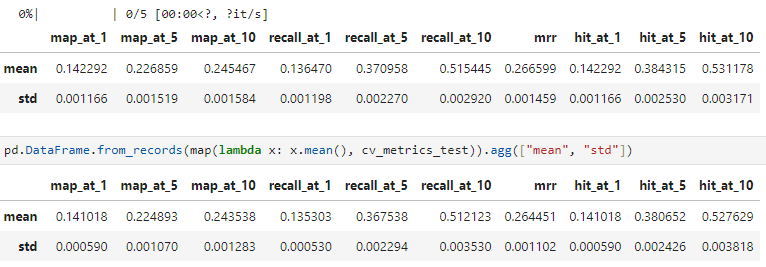

## Вывод: 

В данном блокноте была проделана следующая работа.

### В первом этапе:
Обнаружено следующее:

- Невысокая доля верных подборов: 1,3% верных против 98,7% неверных
- В датасете имеются 15 признаков: query_id и rn - целочисленные, report_date - время, target - логическая, остальные вещественныe
- Пропуски имеются в feature_5 и feature_8, 1.4% и 34% соответсевнно
- Имеются данные с 1 (четврег)1 января по 25 января 2 для обучаюшей выборки.  С 26 января по 28 января 2024 года для тестовой выборки.
- В данных нет дубликатов
- В стобце Feature 2 найдены выбросы 9 значений больше 2.4. И все они относятся к ложной выдачи. Эти значения отрицательного класса удалены, так как они искажают данные перекосом в большую сторону
- В распределении 5 признака выбивается пик в 0.87. Его природа неясна. Пик не связан с датой
- Feature 6 распределен не равномерно, 83% значений признака = 0. При этом соотношение классов целевого признака разное. Для 0, 1.2%; меньше 0, 1.4%; больше 0, 1.8%
- Ящик с усами показал выбросы Feature 10 ниже 3.6. Однако барплот показал, что такое распределение связано  с дискредностью признака
- Таблица корреляций показла, что  rn коррелирует feature_9, feature_7, feaure_4, tratget. Возможно, feature_9 - цена товара
- Так же имеется высокая корреляция между feature_1 и feature_3, feature_4 и feature_7.
- feature 11 коррелирует с днем, причина пока также не ясна

### Во втором этапе:

Были рассмотрены метрики качества, выбран NDCG. Рассмотрены три подхода RankNet, ListNet, LambdaMART и проведено сравнение их плюсов и минусов. Для небольшого количества данных как в нашем случае чаще лучше работает LabmbdaMART, тем не менее, так как это пет проект, будем использовать ListNet и RankNet для отработки PyTorch. LambdaMART имеет готовую реализацию в CatRank, LGBTRank и др, поэтому ее реализация достаточно проста. 

### В третьем этапе:

Рассмотрен базовый алгоритм логистической регрессии, проведено заполнение пропусков средним значением, расчитаны метрики.


Следующий этап включает обучение и кросс валидацию ListNet и RankNet, для удобства **4 этап** вынесен в отдельный блокнот. 